In [7]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

spark = SparkSession.builder.master("local[10]").getOrCreate()
spark.sparkContext.setLogLevel("ERROR")

df = spark.read.parquet("parquet/run1024_srppac.parquet")
df.show(5)
print(df.filter("charge2_x > 0 AND charge2_y > 0 AND ABS(id0_x - id1_x) = 1 AND ABS(id0_y - id1_y) = 1 AND ABS(id0_x - id2_x) = 1 AND ABS(id0_y - id2_y) = 1").count())

+---------+----------------+--------------------+--------------------+------+-------------------+------------------+-----------------+------------------+-----+-----+-----+-------------------+------------+--------------------+--------------------+------+-------------------+-----------------+------------------+------------------+-----+-----+-----+--------------------+-------+
|hbfNumber|            id_x|            timing_x|            charge_x|size_x|          timing0_x|         charge0_x|        charge1_x|         charge2_x|id0_x|id1_x|id2_x|             q0q1_x|        id_y|            timing_y|            charge_y|size_y|          timing0_y|        charge0_y|         charge1_y|         charge2_y|id0_y|id1_y|id2_y|              q0q1_y|runname|
+---------+----------------+--------------------+--------------------+------+-------------------+------------------+-----------------+------------------+-----+-----+-----+-------------------+------------+--------------------+--------------------+

Statistics:
[[0.000e+00 2.000e+00 0.000e+00]
 [0.000e+00 8.626e+03 6.000e+00]
 [0.000e+00 0.000e+00 0.000e+00]]
Statistics:
[[0.000e+00 3.000e+00 0.000e+00]
 [0.000e+00 8.611e+03 1.100e+01]
 [0.000e+00 0.000e+00 0.000e+00]]


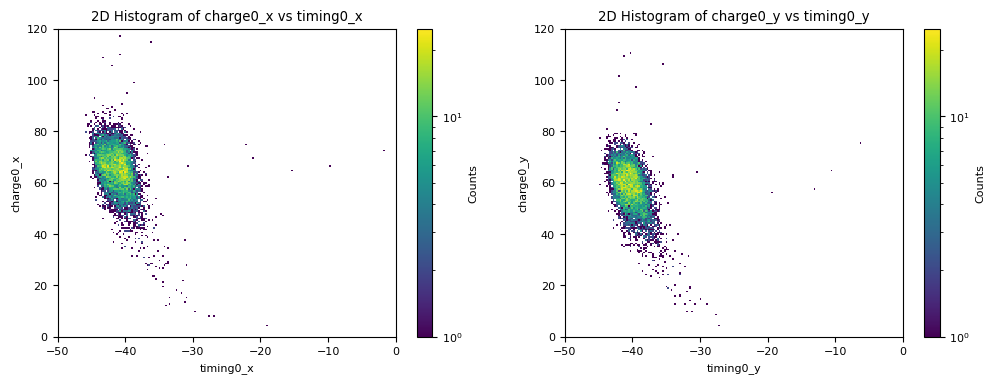

In [8]:
from hist.sparkHist2d import Hist2DArrays
from hist.sparkHist2d import Hist2D
from hist.sparkHist1d import Hist1D
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

plt.figure(0, figsize=(12,4))
plt.rcParams["font.size"] = 8
plt.subplot2grid((1,2),(0,0))
h = Hist2D(df, ["timing0_x","charge0_x"], [200,200], [[-50, 0], [0, 120]], norm=LogNorm(), interpolation='none')
plt.subplot2grid((1,2),(0,1))
h = Hist2D(df, ["timing0_y","charge0_y"], [200,200], [[-50, 0], [0, 120]], norm=LogNorm(), interpolation='none')
plt.show()  

Total entries: 8634, Underflow: 0, Inside: 8607, Overflow: 27
Total entries: 8625, Underflow: 0, Inside: 8596, Overflow: 29


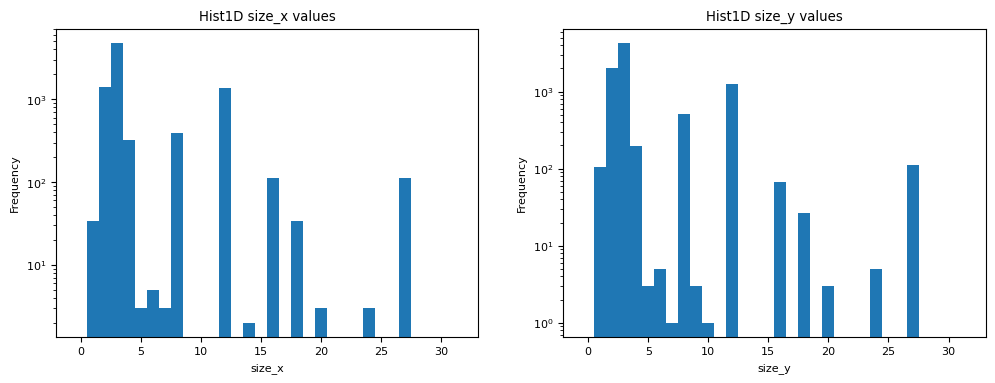

In [9]:
plt.figure(0, figsize=(12,4))
plt.rcParams["font.size"] = 8
plt.subplot2grid((1,2),(0,0))
h = Hist1D(df, "size_x", 33, [-0.5, 31.5])
plt.yscale('log')
plt.subplot2grid((1,2),(0,1))
h = Hist1D(df, "size_y", 33, [-0.5, 31.5])
plt.yscale('log')
plt.show()

Statistics:
[[0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 6.575e+03 4.000e+00]
 [0.000e+00 0.000e+00 0.000e+00]]
Statistics:
[[   0.    0.    0.]
 [   0. 6596.    7.]
 [   0.    0.    0.]]


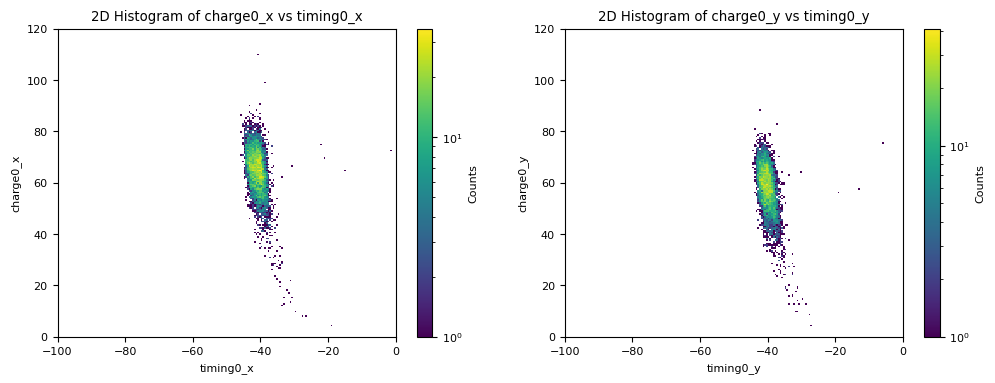

In [10]:
plt.figure(0, figsize=(12,4))
plt.rcParams["font.size"] = 8
plt.subplot2grid((1,2),(0,0))
h = Hist2D(df.filter("size_x<7"), ["timing0_x","charge0_x"], [200,200], [[-100, 0], [0, 120]], norm=LogNorm(), interpolation='none')
plt.subplot2grid((1,2),(0,1))
h = Hist2D(df.filter("size_y<7"), ["timing0_y","charge0_y"], [200,200], [[-100, 0], [0, 120]], norm=LogNorm(), interpolation='none')
plt.show() 

Statistics:
[[   0.    0.    0.]
 [   0. 6557.    0.]
 [   0.    0.    0.]]
Statistics:
[[   0.    0.    0.]
 [   0. 6534.    0.]
 [   0.    0.    0.]]
Statistics:
[[   0.    0.    0.]
 [   0. 5131.    0.]
 [   0.    0.    0.]]
Statistics:
[[   0.    0.    0.]
 [   0. 6557.    0.]
 [   0.    0.    0.]]
Statistics:
[[   0.    0.    0.]
 [   0. 6459.    0.]
 [   0.    0.    0.]]
Statistics:
[[   0.    0.    0.]
 [   0. 4464.    0.]
 [   0.    0.    0.]]


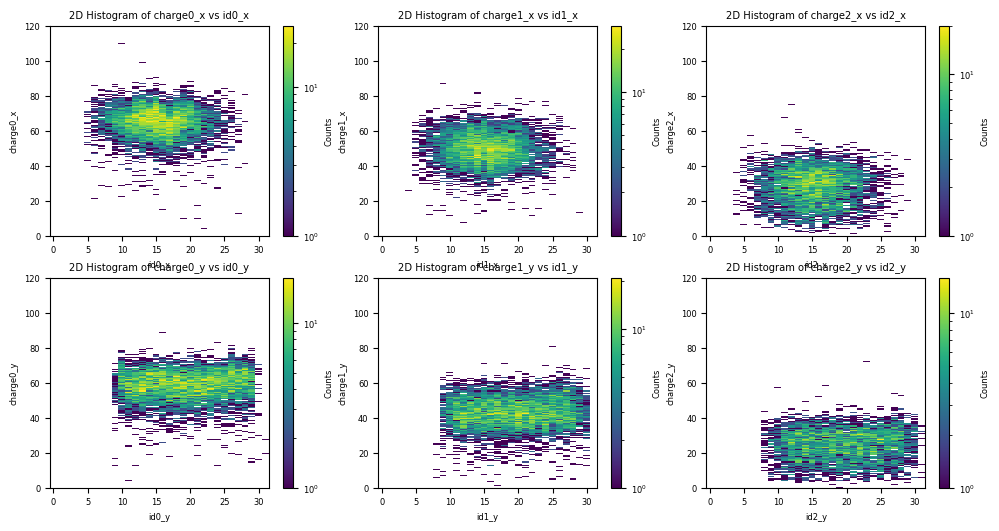

In [11]:
df_f = df.filter("size_x<7").filter("size_y<7")
plt.figure(0, figsize=(12,6))
plt.rcParams["font.size"] = 6
plt.subplot2grid((2,3),(0,0))
h = Hist2D(df_f, ["id0_x","charge0_x"], [33,200], [[-0.5, 31.5], [0, 120]], norm=LogNorm(), interpolation='none')
plt.subplot2grid((2,3),(0,1))
h = Hist2D(df_f, ["id1_x","charge1_x"], [33,200], [[-0.5, 31.5], [0, 120]], norm=LogNorm(), interpolation='none')
plt.subplot2grid((2,3),(0,2))
h = Hist2D(df_f, ["id2_x","charge2_x"], [33,200], [[-0.5, 31.5], [0, 120]], norm=LogNorm(), interpolation='none')
plt.subplot2grid((2,3),(1,0))
h = Hist2D(df_f, ["id0_y","charge0_y"], [33,200], [[-0.5, 31.5], [0, 120]], norm=LogNorm(), interpolation='none')
plt.subplot2grid((2,3),(1,1))
h = Hist2D(df_f, ["id1_y","charge1_y"], [33,200], [[-0.5, 31.5], [0, 120]], norm=LogNorm(), interpolation='none')
plt.subplot2grid((2,3),(1,2))
h = Hist2D(df_f, ["id2_y","charge2_y"], [33,200], [[-0.5, 31.5], [0, 120]], norm=LogNorm(), interpolation='none')
plt.show() 

Statistics:
[[   0.    0.    0.]
 [   0. 6557.    0.]
 [   0.    0.    0.]]


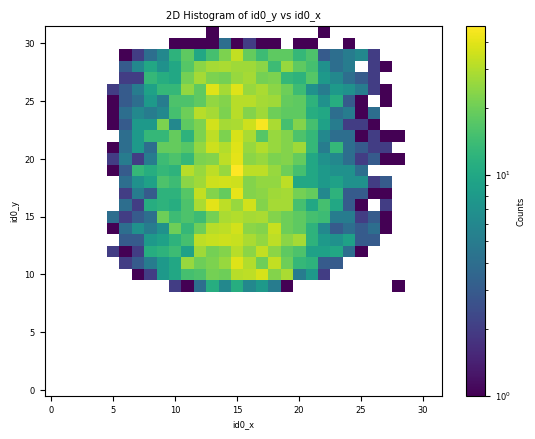

Statistics:
[[   0.    0.    0.]
 [   0. 6446.    0.]
 [   0.    0.    0.]]


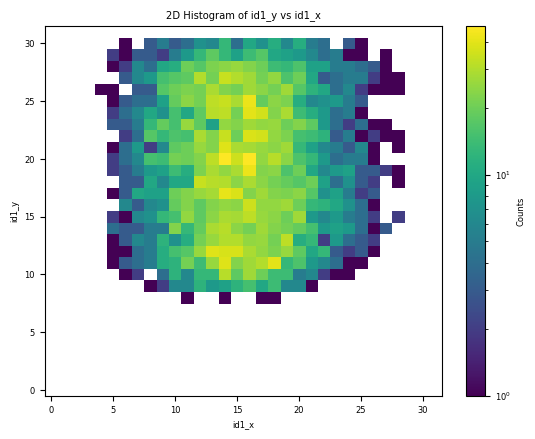

In [12]:
h = Hist2D(df_f, ["id0_x","id0_y"], [33,33], [[-0.5, 31.5], [-0.5,31.5]], norm=LogNorm(), interpolation='none')
plt.show()
h = Hist2D(df_f, ["id1_x","id1_y"], [33,33], [[-0.5, 31.5], [-0.5,31.5]], norm=LogNorm(), interpolation='none')